In [1]:
# libraries
require(eulerr)
require(ggplot2)
require(ggalluvial)

Lade nötiges Paket: eulerr

Lade nötiges Paket: ggplot2

Lade nötiges Paket: ggalluvial



In [2]:
input_dir <- "./input/"

Load data.

In [3]:
suppressWarnings(load(paste0(input_dir,"community_interactions.RData")))
print(str(community_interactions))

List of 23
 $ per_sample_anno_interactions:List of 13
  ..$ AML-0024    :'data.frame':	151744 obs. of  29 variables:
  .. ..$ interaction_ID     : chr [1:151744] "Mono:A2M_Mono:LRP1" "Mono:ACTR2_Mono:ADRB2" "Mono:ACTR2_Mono:LDLR" "Mono:ADM_Mono:ACKR3" ...
  .. ..$ ligand_gene_name   : chr [1:151744] "A2M" "ACTR2" "ACTR2" "ADM" ...
  .. ..$ receptor_gene_name : chr [1:151744] "LRP1" "ADRB2" "LDLR" "ACKR3" ...
  .. ..$ sending_cell_type  : chr [1:151744] "Mono" "Mono" "Mono" "Mono" ...
  .. ..$ receiving_cell_type: chr [1:151744] "Mono" "Mono" "Mono" "Mono" ...
  .. ..$ f_s                : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ f_r                : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ f_s_max            : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ f_r_max            : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ a_s_l              : num [1:151744] 0 0.859 0.859 0.699 0.699 ...
  .. ..$ nr_s_l_active      : num [1:151744] 0 4682 4682 3810 3

In [4]:
suppressWarnings(load(paste0(input_dir,"cpdb_interactions.RData")))
print(str(cpdb_interactions))

List of 2
 $ weights          :'data.frame':	2421 obs. of  13 variables:
  ..$ AML-0024    : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ AML-0160    : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ AML-0693    : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ AML-1371    : num [1:2421] 1.099 0.99 0.598 0.919 0.758 ...
  ..$ AML-2123    : num [1:2421] 0.808 0 0.355 0.769 0.598 0.757 0.917 0.882 0.724 0 ...
  ..$ AML-3133    : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ AML-4340    : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ healthy-1   : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ healthy-2   : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ healthy-3   : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ healthy-4   : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ healthy-4003: num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ healthy-5   : num [1:2421] 0 0 0 0 0 0 0 0 0 0 ...
 $ anno_interactions:'data.frame':	2421 obs. of  13 variables:
  ..$ interaction_ID     : chr [1:2421] "DC:HBEGF_Mono:CD9" "Gran:HBEGF_Mono:CD9" 

In [5]:
suppressWarnings(load(paste0(input_dir,"nn_interactions.RData")))
print(str(nn_interactions))

List of 2
 $ weights          :'data.frame':	10348 obs. of  13 variables:
  ..$ AML-0024    : num [1:10348] 0.2236 0.1229 0.0699 0.022 0.0224 ...
  ..$ AML-0160    : num [1:10348] NA 0.1229 NA 0.022 0.0224 ...
  ..$ AML-0693    : num [1:10348] NA 0.1229 NA 0.022 0.0224 ...
  ..$ AML-1371    : num [1:10348] NA 0.1229 0.0699 0.022 0.0224 ...
  ..$ AML-2123    : num [1:10348] NA 0.1229 NA 0.022 0.0224 ...
  ..$ AML-3133    : num [1:10348] NA NA 0.0699 0.022 0.0224 ...
  ..$ AML-4340    : num [1:10348] NA NA NA 0.022 0.0224 ...
  ..$ healthy-1   : num [1:10348] NA 0.1229 NA 0.022 0.0224 ...
  ..$ healthy-2   : num [1:10348] NA 0.1229 NA 0.022 0.0224 ...
  ..$ healthy-3   : num [1:10348] NA NA NA 0.022 0.0224 ...
  ..$ healthy-4   : num [1:10348] NA NA NA 0.022 0.0224 ...
  ..$ healthy-4003: num [1:10348] NA NA NA 0.022 0.0224 ...
  ..$ healthy-5   : num [1:10348] NA 0.1229 NA 0.022 0.0224 ...
 $ anno_interactions:'data.frame':	10348 obs. of  9 variables:
  ..$ interaction_ID    : chr [1:10

In [6]:
# check if all interaction IDs for CPDB are in community (all)
all(cpdb_interactions$anno_interactions$interaction_ID %in% community_interactions$anno_interactions$interaction_ID)

[1] TRUE

In [7]:
# check if all interaction IDs for CPDB are in community (all)
all(nn_interactions$anno_interactions$interaction_ID %in% community_interactions$anno_interactions$interaction_ID)

[1] TRUE

# plot data

## Euler diagram of differential interactions

In [8]:
# index of significant interactions in community
idx_sign <- !is.na(community_interactions$anno_interactions$sign) & community_interactions$anno_interactions$sign

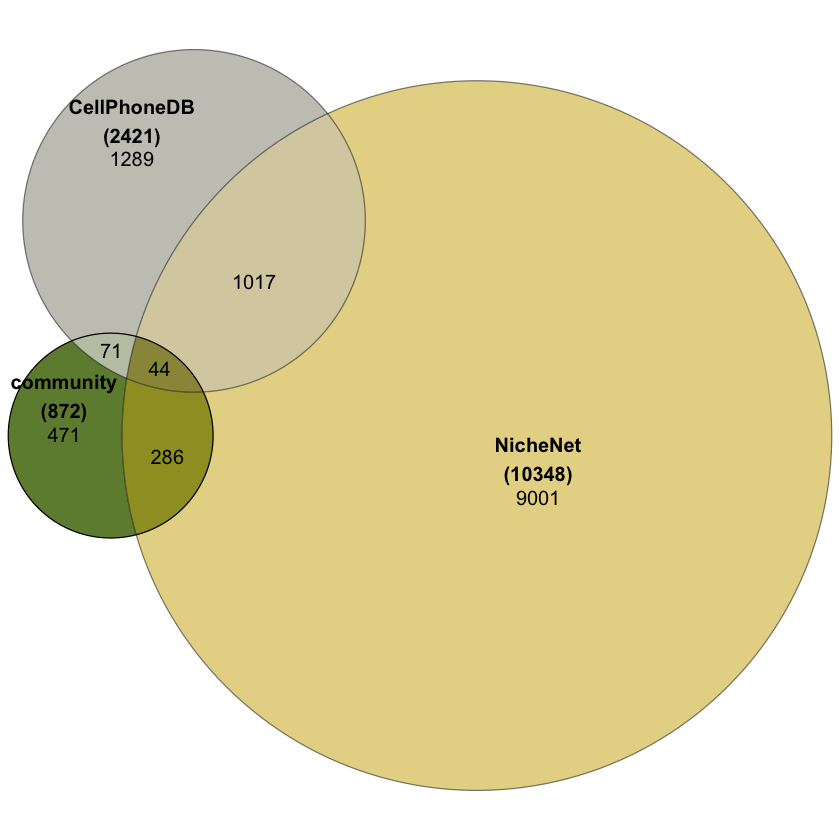

In [9]:
int_list <- list(community = community_interactions$anno_interactions$interaction_ID[idx_sign]
                ,NicheNet = nn_interactions$anno_interactions$interaction_ID
                ,CellPhoneDB = cpdb_interactions$anno_interactions$interaction_ID
                )

# add numbers to the names
numbers <- c(sum(idx_sign)
            ,length(nn_interactions$anno_interactions$interaction_ID)
            ,length(cpdb_interactions$anno_interactions$interaction_ID)
            )
names(int_list) <- paste0(names(int_list)
                         ,"\n"
                         ,"("
                         ,numbers
                         ,")")

plot(euler(int_list
          )
     ,fills = c(community = "darkolivegreen4"
                ,NicheNet = "gold3"
                ,CellPhoneDB = "cornsilk4"#"rosybrown"
               )
     ,alpha=c(1,0.5,0.5)
     ,quantities = list(fontsize = 12)
    )

## Interactions stratified by quality

In [10]:
# index of good interactions for community
idx_good <- community_interactions$anno_interactions$passed_QC_filter

In [11]:
# stacked bar
id_good <- community_interactions$anno_interactions$interaction_ID[idx_good]
id_bad <- community_interactions$anno_interactions$interaction_ID[!idx_good]
data <- data.frame(algorithm = c("CPDB"
                                 ,"CPDB"
                                 ,"NicheNet"
                                 , "NicheNet"
                                )
                  ,quality_by_community = c("good"
                                           ,"bad"
                                           ,"good"
                                           ,"bad"
                                           )
                  ,number = c(sum(cpdb_interactions$anno_interactions$interaction_ID %in% id_good)
                              ,sum(cpdb_interactions$anno_interactions$interaction_ID %in% id_bad)
                              ,sum(nn_interactions$anno_interactions$interaction_ID %in% id_good)
                              ,sum(nn_interactions$anno_interactions$interaction_ID %in% id_bad)
                             )
                  )

  algorithm quality_by_community number
1      CPDB                 good   1236
2      CPDB                  bad   1185
3  NicheNet                 good   4436
4  NicheNet                  bad   5912


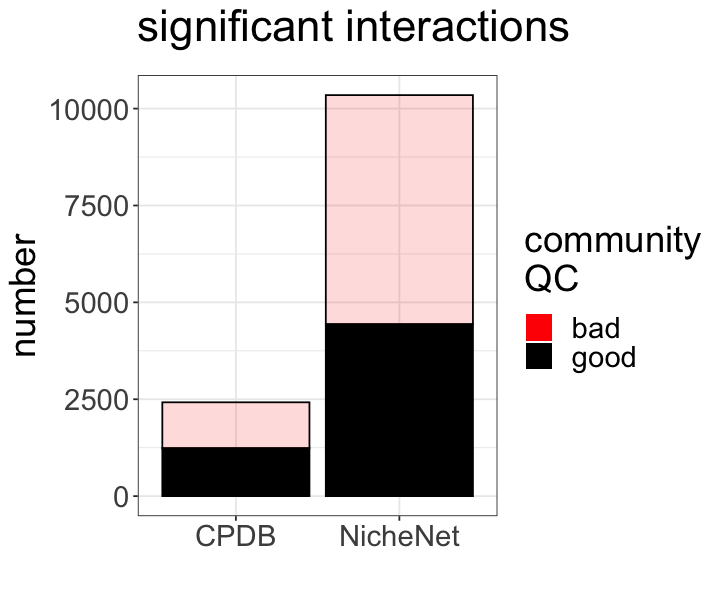

In [12]:
print(data)
options(repr.plot.width = 6
       ,repr.plot.height = 5)
ggplot(data
       , aes(x=algorithm
             , y=number
             ,fill=quality_by_community 
             ,color=quality_by_community
             ,alpha=quality_by_community
            )
      ) + 
    geom_bar(position="stack"
             ,stat="identity"
            )+
xlab("")+
ggtitle("significant interactions")+
scale_fill_manual(name = "community\nQC"
                   ,values = c("red","black")
                   )+
scale_color_manual(name= NULL
                  ,values = c("black","black")
                  ,guide = "none")+
scale_alpha_manual(name= NULL
                  ,values = c(0.15,1)
                  ,guide = "none"
                  )+
theme_bw()+
theme(text = element_text(size=22)
      ,plot.title = element_text(margin = margin(t = 0, r = 0, b = 15, l = 0))
     )

In [13]:
plot_nr_samples <- function(my_df
                           ,name){
    options(repr.plot.height = 5
        ,repr.plot.width = 5)
ggplot(data = my_df
      ,aes(x = number_healthy
          ,y = number_aml
          )
      )+
geom_jitter()+
theme_bw()+
xlab("number of healthy samples")+
ylab("number of AML samples")+
theme(text = element_text(size=22)
      ,plot.title = element_text(margin = margin(t = 0, r = 0, b = 15, l = 0))
      ,axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0))
     )+
ggtitle(name)
}

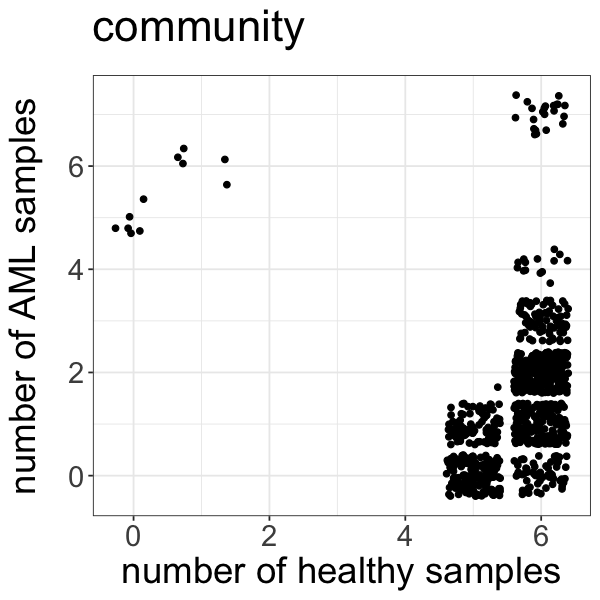

In [14]:
# sample coverage: community
idx_case <- community_interactions$anno_samples$case_or_control == "case"
non_zero_weights <- community_interactions$weights[idx_sign,] !=0
df <- data.frame(interaction_ID = community_interactions$anno_interactions$interaction_ID[idx_sign]
                ,number_healthy = rowSums(non_zero_weights[,!idx_case])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )

plot_nr_samples(df,"community")

'data.frame':	2421 obs. of  13 variables:
 $ AML-0024    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AML-0160    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AML-0693    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AML-1371    : num  1.099 0.99 0.598 0.919 0.758 ...
 $ AML-2123    : num  0.808 0 0.355 0.769 0.598 0.757 0.917 0.882 0.724 0 ...
 $ AML-3133    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AML-4340    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ healthy-1   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ healthy-2   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ healthy-3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ healthy-4   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ healthy-4003: num  0 0 0 0 0 0 0 0 0 0 ...
 $ healthy-5   : num  0 0 0 0 0 0 0 0 0 0 ...
 logi [1:2421, 1:13] FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:2421] "B:HLA-C_NK:CD3D" "DC:HLA-C_NK:CD3D" "Ery:HLA-C_NK:CD3D" "Gran:HLA-C_NK:CD3D" ...
  ..$ : chr [1:13] "AML-0024" "AML-0160" "AML-0693" "AML-1371" ...


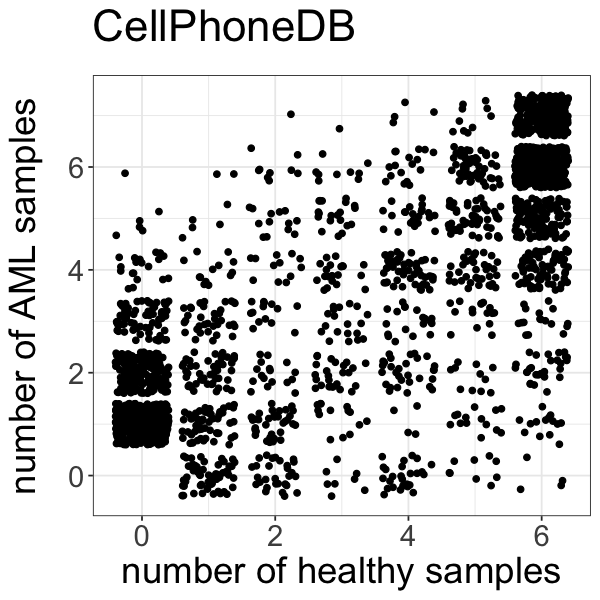

In [15]:
# sample coverage: CPDB
idx_case <- grepl("AML",colnames(cpdb_interactions$weights))
non_zero_weights <- cpdb_interactions$weights !=0
str(cpdb_interactions$weights)
str(non_zero_weights)
df_cpdb <- data.frame(interaction_ID = rownames(cpdb_interactions$weights)
                ,number_healthy = rowSums(non_zero_weights[,!idx_case])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )


plot_nr_samples(df_cpdb, "CellPhoneDB")

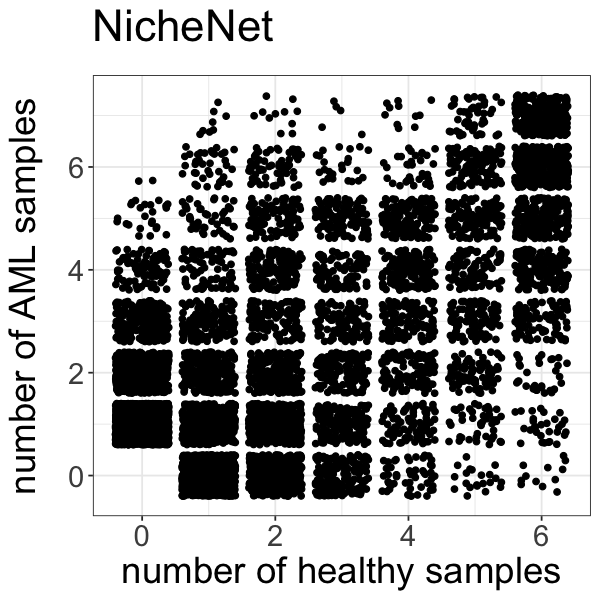

In [16]:
# sample coverage:NN
idx_case <- grepl("AML",colnames(nn_interactions$weights))
non_zero_weights <- !is.na(nn_interactions$weights)
df_nn <- data.frame(interaction_ID = rownames(nn_interactions$weights)
                ,number_healthy = rowSums(non_zero_weights[,!idx_case])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )


plot_nr_samples(df_nn, "NicheNet")

List of 3
 $ community  : chr [1:872] "Mono:RETN_Mono:CAP1" "Mono:PTGS2_Mono:ALOX5" "Mono:ANXA1_Gran:FPR1" "Mono:RETN_Gran:CAP1" ...
 $ NicheNet   : chr [1:3359] "Mono:ACTR2_Mono:LDLR" "Mono:ADAM10_Mono:CD44" "Mono:ADAM10_Mono:IL6R" "Mono:ADAM10_Mono:NOTCH2" ...
 $ CellPhoneDB: chr [1:1395] "DC:HBEGF_HSPC:CD44" "Gran:HBEGF_HSPC:CD44" "Mono:HBEGF_HSPC:CD44" "DC:HBEGF_T:CD44" ...
NULL


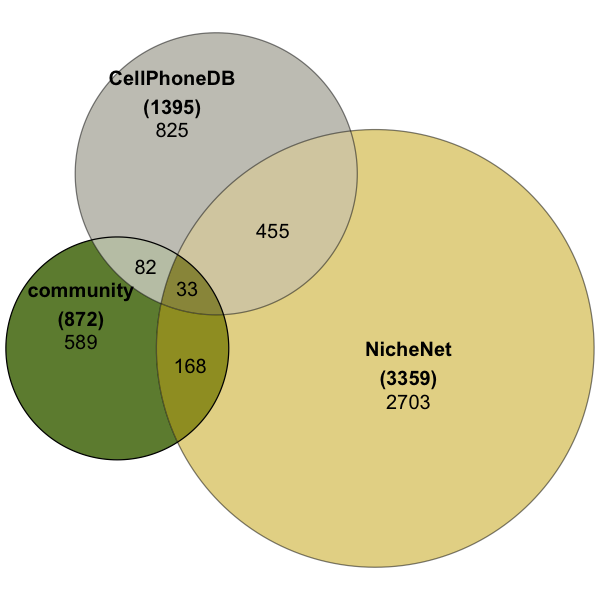

In [17]:
idx_good_cpdb <- df_cpdb$number_healthy >= 4 | df_cpdb$number_aml >= 4
idx_good_nn <- df_nn$number_healthy >= 4 | df_nn$number_aml >= 4

int_list <- list(community = community_interactions$anno_interactions$interaction_ID[idx_sign]
                ,NicheNet = df_nn$interaction_ID[idx_good_nn]
                ,CellPhoneDB = df_cpdb$interaction_ID[idx_good_cpdb]
                )
print(str(int_list))

# add numbers to the names
numbers <- c(sum(idx_sign)
            ,sum(idx_good_nn)
            ,sum(idx_good_cpdb)
            )
names(int_list) <- paste0(names(int_list)
                         ,"\n"
                         ,"("
                         ,numbers
                         ,")")

plot(euler(int_list
         # , shape = "ellipse"
          )
     ,fills = c(community = "darkolivegreen4"
                ,NicheNet = "gold3"
                ,CellPhoneDB = "cornsilk4"#"rosybrown"
               )
     ,alpha=c(1,0.5,0.5)
     ,quantities = list(fontsize = 12)
    )

## Alluvial plot of interactions

The direction of interaction chnges for CPDB and NN will be defined by using the log2FC of the ligand and the receptor. If one or both are upregulated, then the interaction is upregulated. If one or both are downregulated, the interaction is downregulated. If the ligand and the receptor is changed in the disconcordant direciton, then the interaction is ambigous.

In [18]:
head(cpdb_interactions$anno_interactions) 

,interaction_ID,sender_celltype,sender_gene,receiver_celltype,receiver_gene,ligand_log2FC,ligand_p_val_adj,receptor_log2FC,receptor_p_val_adj,mean_weigth_case,mean_weight_control,log2FC_weights,direction
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,DC:HBEGF_Mono:CD9,DC,HBEGF,Mono,CD9,NA,NA,0.3529761,0.000000e+00,0.12900000,0.1081667,0.2541151,down
2,Gran:HBEGF_Mono:CD9,Gran,HBEGF,Mono,CD9,NA,NA,0.3529761,0.000000e+00,0.20028571,0.1265000,0.6629221,down
3,HSPC:HBEGF_Mono:CD9,HSPC,HBEGF,Mono,CD9,NA,NA,0.3529761,0.000000e+00,0.04728571,0.0300000,0.6564419,down
4,Mono:HBEGF_Mono:CD9,Mono,HBEGF,Mono,CD9,NA,NA,0.3529761,0.000000e+00,0.26442857,0.1626667,0.7009594,down
5,DC:HBEGF_HSPC:CD44,DC,HBEGF,HSPC,CD44,NA,NA,0.3099310,2.781776e-82,0.36433333,0.3075000,0.2446726,down
6,Ery:HBEGF_HSPC:CD44,Ery,HBEGF,HSPC,CD44,NA,NA,0.3099310,2.781776e-82,0.27016667,0.0700000,1.9484229,up


In [19]:
head(nn_interactions$anno_interactions) 

,interaction_ID,sender_celltype,sender_gene,receiver_celltype,receiver_gene,ligand_log2FC,ligand_p_val_adj,receptor_log2FC,receptor_p_val_adj
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mono:ACKR3_Mono:CXCR4,Mono:ACKR3_Mono:CXCR4,Mono,ACKR3,Mono,CXCR4,0.2595831,0,0.3312534,0
Mono:ACTR2_Mono:LDLR,Mono:ACTR2_Mono:LDLR,Mono,ACTR2,Mono,LDLR,NA,NA,NA,NA
Mono:ADAM10_Mono:CADM1,Mono:ADAM10_Mono:CADM1,Mono,ADAM10,Mono,CADM1,NA,NA,NA,NA
Mono:ADAM10_Mono:CD44,Mono:ADAM10_Mono:CD44,Mono,ADAM10,Mono,CD44,NA,NA,NA,NA
Mono:ADAM10_Mono:IL6R,Mono:ADAM10_Mono:IL6R,Mono,ADAM10,Mono,IL6R,NA,NA,NA,NA
Mono:ADAM10_Mono:NOTCH2,Mono:ADAM10_Mono:NOTCH2,Mono,ADAM10,Mono,NOTCH2,NA,NA,NA,NA


In [20]:
# reassign directions for CPDB
# REMOVE THIS CODE CHUNK!!!!!!!!!!!

cpdb_interactions$anno_interactions$direction_lig <- NA
cpdb_interactions$anno_interactions$direction_rec <- NA

cpdb_interactions$anno_interactions$direction_lig[!is.na(cpdb_interactions$anno_interactions$ligand_log2FC) & (cpdb_interactions$anno_interactions$ligand_log2FC < 0)] <- "down"
cpdb_interactions$anno_interactions$direction_lig[!is.na(cpdb_interactions$anno_interactions$ligand_log2FC) & (cpdb_interactions$anno_interactions$ligand_log2FC > 0)] <- "up"

cpdb_interactions$anno_interactions$direction_rec[!is.na(cpdb_interactions$anno_interactions$receptor_log2FC) & (cpdb_interactions$anno_interactions$receptor_log2FC < 0)] <- "down"
cpdb_interactions$anno_interactions$direction_rec[!is.na(cpdb_interactions$anno_interactions$receptor_log2FC) & (cpdb_interactions$anno_interactions$receptor_log2FC > 0)] <- "up"

cpdb_interactions$anno_interactions$direction_lig_rec <- paste(cpdb_interactions$anno_interactions$direction_lig
                                            ,cpdb_interactions$anno_interactions$direction_rec
                                            ,sep = "_")

idx_down <- (cpdb_interactions$anno_interactions$direction_lig_rec == "down_NA") | (
    cpdb_interactions$anno_interactions$direction_lig_rec == "NA_down") | (
    cpdb_interactions$anno_interactions$direction_lig_rec == "down_down")
idx_up <- (cpdb_interactions$anno_interactions$direction_lig_rec == "up_NA") | (
    cpdb_interactions$anno_interactions$direction_lig_rec == "NA_up") | (
    cpdb_interactions$anno_interactions$direction_lig_rec == "up_up")

cpdb_interactions$anno_interactions$direction <- NA
cpdb_interactions$anno_interactions$direction[idx_down] <- "down"
cpdb_interactions$anno_interactions$direction[idx_up] <- "up"
cpdb_interactions$anno_interactions$direction[!(idx_down | idx_up)] <- "ambigous"

In [21]:
# reassign directions for NN
# REMOVE THIS CODE CHUNK!!!!!!!!!!!

nn_interactions$anno_interactions$direction_lig <- NA
nn_interactions$anno_interactions$direction_rec <- NA

nn_interactions$anno_interactions$direction_lig[!is.na(nn_interactions$anno_interactions$ligand_log2FC) & (nn_interactions$anno_interactions$ligand_log2FC < 0)] <- "down"
nn_interactions$anno_interactions$direction_lig[!is.na(nn_interactions$anno_interactions$ligand_log2FC) & (nn_interactions$anno_interactions$ligand_log2FC > 0)] <- "up"

nn_interactions$anno_interactions$direction_rec[!is.na(nn_interactions$anno_interactions$receptor_log2FC) & (nn_interactions$anno_interactions$receptor_log2FC < 0)] <- "down"
nn_interactions$anno_interactions$direction_rec[!is.na(nn_interactions$anno_interactions$receptor_log2FC) & (nn_interactions$anno_interactions$receptor_log2FC > 0)] <- "up"

nn_interactions$anno_interactions$direction_lig_rec <- paste(nn_interactions$anno_interactions$direction_lig
                                            ,nn_interactions$anno_interactions$direction_rec
                                            ,sep = "_")
idx_down <- (nn_interactions$anno_interactions$direction_lig_rec == "down_NA") | (
    nn_interactions$anno_interactions$direction_lig_rec == "NA_down") | (
    nn_interactions$anno_interactions$direction_lig_rec == "down_down")
idx_up <- (nn_interactions$anno_interactions$direction_lig_rec == "up_NA") | (
    nn_interactions$anno_interactions$direction_lig_rec == "NA_up") | (
    nn_interactions$anno_interactions$direction_lig_rec == "up_up")

nn_interactions$anno_interactions$direction <- NA
nn_interactions$anno_interactions$direction[idx_down] <- "down"
nn_interactions$anno_interactions$direction[idx_up] <- "up"
nn_interactions$anno_interactions$direction[!(idx_down | idx_up)] <- "ambigous"


In [22]:
# assign direction to the intersctions in community
idx_down <- community_interactions$anno_interactions$log2FC_weights < 0
idx_up <- community_interactions$anno_interactions$log2FC_weights > 0

community_interactions$anno_interactions$direction <- NA
community_interactions$anno_interactions$direction[idx_down] <- "down"
community_interactions$anno_interactions$direction[idx_up] <- "up"
community_interactions$anno_interactions$direction[!idx_sign] <- "not significant"

In [23]:
table(community_interactions$anno_interactions$direction)


           down not significant              up 
            858          150872              14 

In [24]:
table(cpdb_interactions$anno_interactions$direction)


ambigous     down       up 
      25     1023     1373 

In [25]:
table(nn_interactions$anno_interactions$direction)


ambigous     down       up 
    9288      532      528 

In [26]:
int_alluvial <- unique(c(community_interactions$anno_interactions$interaction_ID[idx_sign]
                         ,df_cpdb$interaction_ID[idx_good_cpdb]
                         ,df_nn$interaction_ID[idx_good_nn]
                            )
                )
print(str(int_alluvial))

 chr [1:4855] "Mono:RETN_Mono:CAP1" "Mono:PTGS2_Mono:ALOX5" ...
NULL


In [27]:
# prepare the df for plotting
# all three algorithms
rownames(community_interactions$anno_interactions) <- community_interactions$anno_interactions$interaction_ID
rownames(cpdb_interactions$anno_interactions) <- cpdb_interactions$anno_interactions$interaction_ID
rownames(nn_interactions$anno_interactions) <- nn_interactions$anno_interactions$interaction_ID

df_facets <- data.frame(interaction_ID = int_alluvial
                       ,community_sign = community_interactions$anno_interactions[int_alluvial,"sign"]
                       ,community_log2FC_weights = community_interactions$anno_interactions[int_alluvial,"log2FC_weights"]
                        ,community = rep(NA,length(int_alluvial))
                       ,CellPhoneDB = cpdb_interactions$anno_interactions[int_alluvial,"direction"]
                       ,NicheNet = nn_interactions$anno_interactions[int_alluvial,"direction"]
                       )

# simplify the categories for community
df_facets$community_sign[is.na(df_facets$community_sign)] <- FALSE

df_facets$community[(df_facets$community_sign) & (df_facets$community_log2FC_weights > 1)] <- "up"
df_facets$community[(df_facets$community_sign) & (df_facets$community_log2FC_weights < -1)] <- "down"
df_facets$community[!df_facets$community_sign] <- "not\nsignificant"

# present in community but not in CPDB
df_facets$CellPhoneDB[is.na(df_facets$CellPhoneDB)] <- "not\nsignificant"

# present in community but not in NN
df_facets$NicheNet[is.na(df_facets$NicheNet)] <- "not\nsignificant"


df_facets$comparison <- sapply(1:nrow(df_facets)
                               ,function(i) {
                                   paste(df_facets[i,c("community","CellPhoneDB","NicheNet")]
                                        ,collapse = " ")
                               })

df_facets$freq <- table(df_facets$comparison)[df_facets$comparison]
df_facets <- df_facets[!duplicated(df_facets$comparison),]


df_facets$community <- factor(df_facets$community
                                  ,levels = c("up"
                                              ,"down"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

df_facets$CellPhoneDB <- factor(df_facets$CellPhoneDB
                                  ,levels = c("up"
                                              ,"down"
                                              ,"ambigous"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

df_facets$NicheNet <- factor(df_facets$NicheNet
                                  ,levels = c("up"
                                              ,"down"
                                              ,"ambigous"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

print((df_facets))

            interaction_ID community_sign community_log2FC_weights
1      Mono:RETN_Mono:CAP1           TRUE               -1.0684138
6      Mono:FCAR_Gran:CD33           TRUE               -4.8427304
8         Mono:ALCAM_T:CD6           TRUE               11.9089569
9          Mono:CD48_T:CD2           TRUE               -2.3308082
19         Mono:B2M_B:TFRC           TRUE               12.1193158
20        Mono:CD99_B:CD81           TRUE               -2.7123604
36   Mono:CALR_HSPC:ITGA2B           TRUE              -11.8973477
401  HSPC:ICAM4_Gran:ITGA4           TRUE              -11.8644054
425    HSPC:GP1BB_NK:ITGB2           TRUE               -2.3578063
873     DC:HBEGF_HSPC:CD44          FALSE                0.3109728
879    Mono:HBEGF_Ery:CD82          FALSE               -2.7052691
880      Ery:CALM1_DC:INSR          FALSE               -5.8039188
901      B:GRN_NK:TNFRSF1B          FALSE                2.3989572
1065  Gran:S100A8_NK:ITGB2          FALSE               -1.903

In [28]:
# prepare colors for plotting
category_colors <- c("not\nsignificant" = "gray90"
                     ,"down" = "lightslateblue"
                     ,"up" = "red3"
                     ,"ambigous" = "darkorchid1"
                    )

Don't know how to automatically pick scale for object of type <table>. Defaulting to continuous.
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


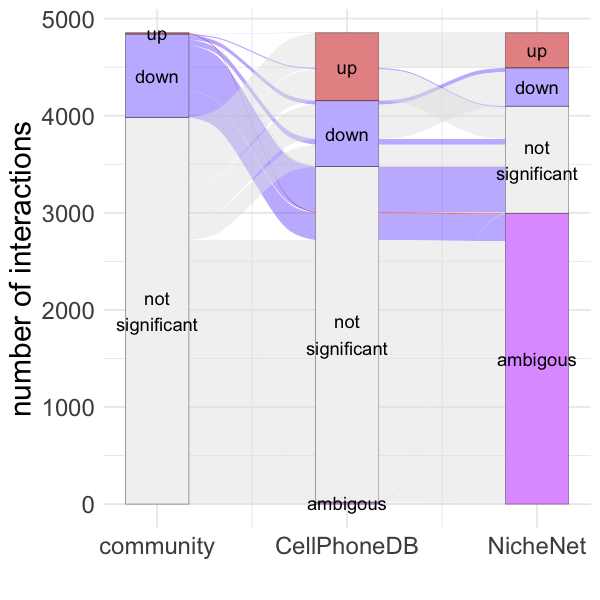

In [29]:
# plot alluvial

options(repr.plot.width = 5
       ,repr.plot.height = 5
       )
ggplot(df_facets,
       aes(y = freq,
           axis1 = community 
           ,axis2 = CellPhoneDB
           ,axis3 = NicheNet
          )
      ) +
geom_alluvium(aes(fill = community)
            #,width = 1/4
             )+
scale_fill_manual(values = category_colors)+
geom_stratum(fill = "white"
            ,linewidth = 0
            #,width = 0.55
            )+
geom_stratum(alpha = 0.5
             ,fill = category_colors[c("not\nsignificant"
                                       ,"down"
                                       ,"up"
                                       
                                      ,"ambigous"
                                       ,"not\nsignificant"
                                       ,"down"
                                       ,"up"
                                      
                                      ,"ambigous"
                                       ,"not\nsignificant"
                                       ,"down"
                                       ,"up"
                                      )
                                    ]
            ,linewidth = 0.1
            )+
geom_text(stat = "stratum"
          ,aes(label = after_stat(stratum))
         ) +
ylab("number of interactions")+
xlab("")+
scale_x_continuous(breaks = 1:3
                   ,labels = c("community", "CellPhoneDB", "NicheNet")
                   
                  ) +
theme_minimal()+
theme(legend.position="none"
     ,text = element_text(size = 18)
     )

## Mono:HMGB1_T:CXCR4 interaction

In [30]:
plot_fractions <- function(interaction_ID
                           ,health_status
                           ,color
                          ,my_interactions
                          ,plot.width=4){
    idx_my_interaction <- my_interactions$anno_interactions$interaction_ID == interaction_ID
    
    if(health_status == "AML_stem"){
        samples <- c("AML-0693","AML-1371","AML-2123","AML-3133","AML-4340")
       idx_samples <- my_interactions$anno_samples$sample_ID %in% samples
       } else if(health_status == "AML_mono"){
        samples <- c("AML-0024","AML-0160")
       idx_samples <- my_interactions$anno_samples$sample_ID %in% samples
    } else {
        idx_samples <- my_interactions$anno_samples$health_status == health_status
    }
    
    sending_cell_type <- my_interactions$anno_interactions$sending_cell_type[idx_my_interaction]
    receiving_cell_type <- my_interactions$anno_interactions$receiving_cell_type[idx_my_interaction]
    
    
    df <- data.frame(fraction = c(unlist(my_interactions$f_s[idx_my_interaction,idx_samples])
                                       ,unlist(my_interactions$f_r[idx_my_interaction,idx_samples])
                                      )
                    ,cell_type = c(rep(sending_cell_type
                                      ,sum(idx_samples))
                                  ,rep(receiving_cell_type
                                      ,sum(idx_samples))
                                  )
                    )
    df$cell_type <- factor(df$cell_type
                              ,levels = c(sending_cell_type
                                         ,receiving_cell_type)
                              ,ordered = TRUE)
    
    
    options(repr.plot.height = 3
        ,repr.plot.width = plot.width)
    
    ggplot(data = df
          ,aes(x = cell_type
              ,y = fraction)
          )+
    geom_boxplot(show.legend = FALSE
                ,alpha = 0.75
                ,fill = color)+
    geom_point(show.legend = FALSE)+
    xlab("")+
    ylab("fraction of cell type")+
    ylim(c(0,1))+
    ggtitle(paste(health_status, "samples"))+
    theme_bw()+
    theme(text = element_text(size=18)
          ,axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
}

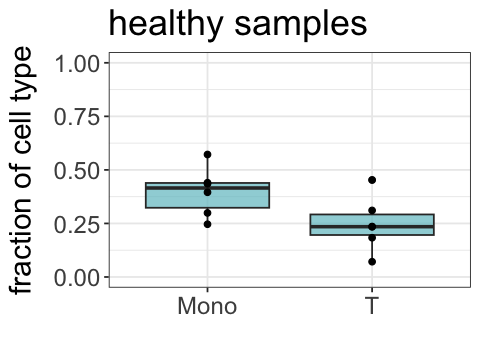

In [31]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"healthy"
               ,"#7ac5cd" # CadetBlue3 for healthy
              ,community_interactions)

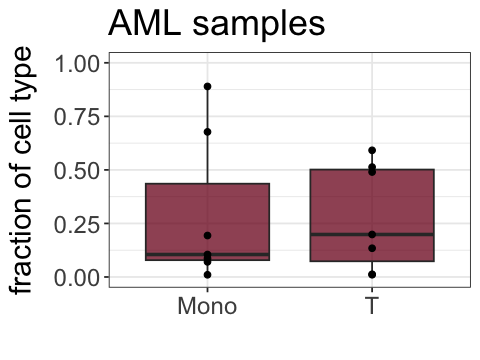

In [32]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"AML"
               ,"#7C001F" # bordeau for AML
              ,community_interactions)

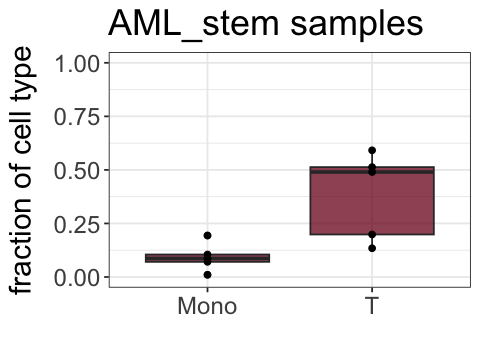

In [33]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"AML_stem"
               ,"#7C001F" # bordeau for AML
              ,community_interactions)

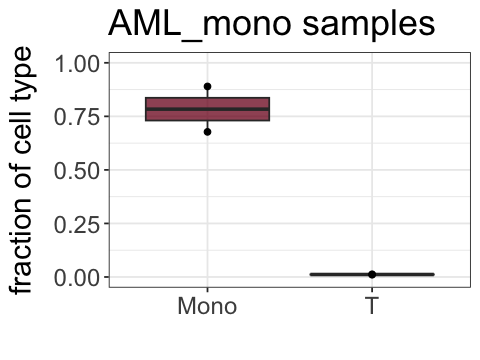

In [34]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"AML_mono"
               ,"#7C001F" # bordeau for AML
              ,community_interactions)

In [35]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggalluvial_0.12.5 ggplot2_3.4.4     eulerr_6.1.1     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.11      pillar_1.9.0     compiler_4.2.2   base64enc_0.1-3 
 [5] tools_4.2.2      digest_0.6.33    uuid_1.1-0       jsonlite_1.8.7  
 [9] evaluate_0.23    lifecycle_1.0.4  tibble_3.2.1     gtable_0.3.4    
[13] pkgconfig_2.0.3  rlang_1.1.2      IRdisplay_1.1    cli_3.6.1       
[17] IRkernel_1.3.1   fastmap_1.1.1    repr_1.1.4       withr_2.5.2     
[21] dplyr_1.1.4      generics_0.1.3   vctrs_0.6.4      grid_4.2.2      
[2